# Kaggle: [Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data?select=Ratings.csv)

**Table of Contents:**


*   Data Loading and Cleaning
  *   Books
  *   Ratings
  *   Users
*   Exploratory Data Analysis (EDA)
  *   Top 25 Best-Selling Authors
  *   Top 25 Best-Selling Authors with Average Book Ratings
  *   Highest-Rated Authors with over 1 Review
  *   Top 25 Best-Selling Books
  *   Pie Charts of Book Ratings
  *   Distribution of Book Ratings
  *   Top 25 Highest-Rated Books
  *   Top 25 Publishing Companies by Number of Books Published
  *   Distribution of Books by Publishing Date




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Download latest version
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print("Path to dataset files:", path)

100%|██████████| 24.3M/24.3M [00:00<00:00, 148MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3


## Data Loading and Cleaning <a class="anchor" id="1"></a>

### Books

In [3]:
# reading book data into a pandas dataframe
books = pd.read_csv(path+'/Books.csv')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# do not need the image URLs, will drop the last 3 rows

books = books.iloc[:,:-3]
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [5]:
# looking at nulls
print(books.shape)
print()
display(books.info())

(271360, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


None

#### Recommended cleaning from Kaggle data page

In [6]:
# from recommended notebook on kaggle

#investigating the rows having 'DK Publishing Inc' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [7]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


In [8]:
#investigating the rows having 'Gallimard' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [9]:
#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


#### Back to my own analysis

In [10]:
books[books.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [11]:
# I can manually fill in as much missing data as I can
# no author info was available on either books with missing author, will drop those rows

books.iloc[128890]['Publisher'] = 'NovelBooks Inc' # tried to follow the formatting in table
books.iloc[129037]['Publisher'] = 'CreateSpace Independent Publishing'
books = books.drop([118033, 187689])

# double check to make sure all nulls are fixed
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


In [12]:
# now looking into other possible data issues (duplicates, incorrect years, etc.)
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271358,271358,271358,271358,271358
unique,271358,242133,102020,200,16805
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


Possible issues to check for within each column:



*   IBSN
  *   Should be between 10 and 13 digits (inclusive)
  *   [Source](https://www.isbn-international.org/content/what-isbn/10#:~:text=An%20ISBN%20is%20an%20International,digit%20to%20validate%20the%20number.)
*   Book-Title
  *   N/A
*   Book-Author
  *   Should have 'real' names, not numbers
*   Year-Of-Publication
  *   Year must be over 0 and less than or equal to 2025
*   Publisher
  *   Clean text format

In [13]:
# ISBN - no changes necessary

lengths = books['ISBN'].str.len()
min_lengths = lengths.min()
max_lengths = lengths.max()
print(min_lengths)
print(max_lengths)

10
13


In [14]:
# Book Author

books.sort_values(['Book-Author'], ascending=False).head(20)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
33914,2290048763,Mademoiselle Chambon,Ã?Â?ric Holder,1998,J'ai lu
139818,2268045757,Maximes et pensÃ?Â©es : Ã?Â?pictÃ?Â¨te,Ã?Â?pictÃ?Â¨te,2003,Editions du Rocher
191514,3518188070,"Suhrkamp BasisBibliothek (SBB), Nr.7, Jugend o...",Ã?Â?dÃ?Â¶n von Horvath,1999,Suhrkamp
165592,351837561X,"SportmÃ¤rchen, andere Prosa und Verse (Gesamme...",Ã?dÃ¶n von HorvÃ¡th,1988,Suhrkamp
177815,3518067540,Die stille Revolution: Kleine Prosa (Suhrkamp-...,Ã?dÃ¶n von HorvÃ¡th,1975,Suhrkamp
258740,3518375547,Geschichten aus dem Wiener Wald (Gesammelte We...,Ã?dÃ¶n von HorvÃ¡th,1986,Suhrkamp
212855,8205232318,Hva skal vi gjÂ²re i dag: Og andre noveller,Â¢ystein LÂ²nn,1995,Gyldendal
234548,1931696810,Mating Season,x x,2002,"NovelBooks, Inc."
149212,1591050367,An American Redneck in Hong Kong,x x,2002,"NovelBooks, Inc."
212941,1591050804,Winter Fire,x x,2002,"NovelBooks, Inc."


In [15]:
# get number of books with 'unknown' and 'x x' as author
books.reset_index(drop=True)
books[(books['Book-Author']=='x x') | (books['Book-Author']=='unknown')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
96703,1561449164,Pound It (Popular Mechanics for Kids),unknown,1997,Modern Publishing
149212,1591050367,An American Redneck in Hong Kong,x x,2002,"NovelBooks, Inc."
207132,1931696837,Unlawful,x x,2002,"NovelBooks, Inc."
212941,1591050804,Winter Fire,x x,2002,"NovelBooks, Inc."
234548,1931696810,Mating Season,x x,2002,"NovelBooks, Inc."
267861,0960638822,A Course In Miracles Workbook for students Man...,unknown,1985,Foundation For Inner Peace


In [16]:
books.loc[149212]['Book-Author'] = 'Michael LaRocca'
books.loc[207132]['Book-Author'] = 'Dorice Nelson'
books.loc[212941]['Book-Author'] = 'Kathy Fischer-Brown'
books.loc[234548]['Book-Author'] = 'Liz Hunter'

# drop unknown author rows
books = books.drop([96703, 267861])

# check
books[(books['Book-Author']=='x x') | (books['Book-Author']=='unknown')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


In [17]:
author_lens = books['Book-Author'].str.strip().apply(len).sort_values()
count = (author_lens < 3).sum()
count

37

We have 37 books by authors with names that are likely not real, since we have about 270,000 books in this dataframe, I think it is fine to drop all of those that are not real.

In [18]:
# list of indexes for authors with less than 3 letters in author name
indx_authors = author_lens[author_lens < 3].index
for i in indx_authors:
  print(books['Book-Author'][i])

X
X
N
M
J
X
F
N
X
X
X
X
S
N
N
Ty
tk
tk
Ai
Na
Ed
tk
Ky
tk
Ai
Na
Bh
Na
tk
Bh
tk
ky
Bh
Ky
P3
Na
Na


In [19]:
# dropping the 37 not real authors
books.drop(indx_authors, inplace=True)

In [20]:
# dropping all books with not applicable authors
na_indx = books[books['Book-Author'] == 'Not Applicable (Na )'].index
books.drop(na_indx, inplace=True)

In [21]:
# Publishing Year
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [22]:
books[books['Year-Of-Publication'] < 1]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri
...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates


In [23]:
books[books['Year-Of-Publication'] > 2025]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin
78168,0870449842,Crossing America,National Geographic Society,2030,National Geographic
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA
118294,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann
192993,0870446924,"Field Guide to the Birds of North America, 3rd...",National Geographic Society,2030,National Geographic
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster
240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books


In [24]:
# to solve this issue I can impute if the authors have other books within this dataset

# I am going to first zero all dates that are not real (if not 0 already)
# next I am going to determine if the authors have other books within this dataset
# finally, I am going to take the average of all publishing dates for that author and fill with that value

# Step 1: Zero out all incorrect dates
books.loc[books['Year-Of-Publication'] > 2025, 'Year-Of-Publication']=0
books[books['Year-Of-Publication'] > 2025]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


In [25]:
# Step 2: Check to see if authors have other books
# I think the best way to break this problem down is to have a dataset of "real" dates
  # and a dataset of "fake" dates, and compare if the fake-date authors are in the real dataset

# create dataframes
real_books = books.loc[books['Year-Of-Publication'] >1] # df of books with valid dates
zero_books = books.loc[books['Year-Of-Publication'] == 0] # df with books where year missing
zero_books.drop('Year-Of-Publication',axis=1,inplace=True)

# get list of overlapping authors and take avg of years
overlap_avg_years = real_books.groupby('Book-Author')['Year-Of-Publication'].mean().round()
overlap_avg_years = overlap_avg_years.reset_index() # avg years for all authors

# match the overlapping authors with those in fake df and fill with avg value
overlap_count = zero_books[zero_books['Book-Author'].isin(overlap_avg_years['Book-Author'])]
print('Potential fixes:', len(overlap_count))

# books that previously had Pub. Year ==0
fixed_books = zero_books.merge(overlap_avg_years, how='left',on='Book-Author')

# dropna's from fixed zero table
fixed_books = fixed_books.dropna()
fixed_books = fixed_books.iloc[:, [0, 1, 2, 4, 3]]
fixed_books

Potential fixes: 3061


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,1994.0,Deutscher Taschenbuch Verlag (DTV)
2,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,1997.0,Faber Faber Inc
5,0345251733,Rainbow the Stormy Life of Judy Garland,Christopher Finch,1986.0,Ballantine Books
6,0590021117,Little House On the Prairie,Laura Ingall Wilder,1993.0,Scholastic Inc
7,2070362388,Ravage,Rene Barjavel,1972.0,Gallimard French
...,...,...,...,...,...
4613,0571204163,Headlong,Michael Frayn,1996.0,Faber Faber Inc
4614,0747512302,Clockers,Richard Price,1995.0,"Bloomsbury Pub Ltd, London"
4616,0752841092,The Ex-files,Jane Moore,2002.0,Orion mass market paperback
4618,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,1989.0,Penguin Books Ltd


In [26]:
# Step 3: Combine tables for final books table

books_clean = pd.concat([real_books, fixed_books])
books_clean.reset_index(drop=True, inplace=True)
print(len(books_clean))
print(len(books_clean.drop_duplicates()))
books_clean

269471
269471


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company
...,...,...,...,...,...
269466,0571204163,Headlong,Michael Frayn,1996.0,Faber Faber Inc
269467,0747512302,Clockers,Richard Price,1995.0,"Bloomsbury Pub Ltd, London"
269468,0752841092,The Ex-files,Jane Moore,2002.0,Orion mass market paperback
269469,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,1989.0,Penguin Books Ltd


In [27]:
# Publisher

# check for publisher names that are abnormally short
pub_lens = books_clean['Publisher'].str.strip().apply(len).sort_values()
pub_count = (pub_lens < 3).sum()
print('Total Num. Incorrect Publisher Names:', pub_count)

indx_pub = pub_lens[pub_lens < 3].index
for i in indx_pub:
  print(books_clean['Publisher'][i])
 #display(books_clean.loc[i]) # prefer this format

Total Num. Incorrect Publisher Names: 10
3
SM
MI
AM
BQ
Sm
MI
QC
LP
US


In [28]:
# I am going to drop the 10 rows with these publishers since I have no way to quickly fill as seen for Pub. Year

books_clean.drop(indx_pub, inplace=True)
books_clean = books_clean.reset_index(drop=True)

In [29]:
books_clean

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company
...,...,...,...,...,...
269456,0571204163,Headlong,Michael Frayn,1996.0,Faber Faber Inc
269457,0747512302,Clockers,Richard Price,1995.0,"Bloomsbury Pub Ltd, London"
269458,0752841092,The Ex-files,Jane Moore,2002.0,Orion mass market paperback
269459,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,1989.0,Penguin Books Ltd


In [30]:
books_clean.to_csv('books.csv', index=False)

### Ratings

In [31]:
# reading rating data into a pandas dataframe
rate = pd.read_csv(path+'/Ratings.csv')
rate.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [32]:
# checking for nulls
print(rate.shape)
print()
display(rate.info())

(1149780, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


None

Possible issues to check for within each column:

*   IBSN
  *   Should be between 10 and 13 digits (inclusive)

*   Book-Rating
  *   Should be from 1 to 10, or 0 (not rated) according to data description


In [33]:
# ISBN

lengths = rate['ISBN'].str.len()
min_lengths = lengths.min()
max_lengths = lengths.max()
print(min_lengths)
print(max_lengths)

8
14


In [34]:
# looking at ISBNs that should not exist
inc_isbn = rate[(rate['ISBN'].apply(lambda x: len(x))<10)|(rate['ISBN'].apply(lambda x: len(x))==14)]
inc_isbn

,User-ID,ISBN,Book-Rating
9,276745,342310538,10
40,276762,342662429,0
247,276856,20103389,0
291,276861,344242529,9
336,276875,00273755,7
...,...,...,...
1148970,276538,344242527,0
1149168,276583,014010559,0
1149192,276619,067976402,8
1149238,276641,033031582,5


In [35]:
# checking to see if any strings with length ==8 or length ==14 in ISBN col of book df
books_clean[books_clean['ISBN'].str.contains('|'.join(inc_isbn))]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


In [36]:
# dropping all incorrect-length ISBN rows
rate.drop(inc_isbn.index, inplace=True)
rate = rate.reset_index(drop=True)

In [37]:
# double check lengths
lengths = rate['ISBN'].str.len()
min_lengths = lengths.min()
max_lengths = lengths.max()
print(min_lengths)
print(max_lengths)

10
13


In [38]:
# Book ratings should be between 1 and 10, or 0 (NR) - no changes necessary

np.sort(rate['Book-Rating'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [39]:
rate.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [40]:
rate.to_csv('ratings.csv', index=False)

### Users

In [41]:
# reading user data into a pandas dataframe
user = pd.read_csv(path+'/Users.csv')
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [42]:
# checking for nulls

print(user.shape)
print()
display(user.info())

(278858, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


None

In [43]:
# will drop age column since about 40% are null

user = user.drop('Age',axis=1)
user.head()

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


In [44]:
# split by comma to city state/territory country

location = user['Location'].str.split(',', expand=True)
user['City'] = location[0]
user['State'] = location[1]
user['Country'] = location[2]

# drop old location column
user = user.drop('Location', axis=1)
user.head()

,User-ID,City,State,Country
0,1,nyc,new york,usa
1,2,stockton,california,usa
2,3,moscow,yukon territory,russia
3,4,porto,v.n.gaia,portugal
4,5,farnborough,hants,united kingdom


In [45]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278858 non-null  int64 
 1   City     278858 non-null  object
 2   State    278857 non-null  object
 3   Country  278856 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.5+ MB


In [46]:
# investigating null rows
n_users = user[user.isnull().any(axis=1)]
display(n_users)

,User-ID,City,State,Country
29419,29420,st. louis,missouri,None
134376,134377,lawrenceville,None,None


In [47]:
display(rate[(rate['User-ID']=='29420')|(rate['User-ID']=='134377')])

# since neither of the users have reviewed books, we will drop the users from this table
user.drop(n_users.index,inplace=True)

,User-ID,ISBN,Book-Rating


In [48]:
# checking for nulls
user[user.isnull().any(axis=1)]

,User-ID,City,State,Country


In [49]:
user.head()

,User-ID,City,State,Country
0,1,nyc,new york,usa
1,2,stockton,california,usa
2,3,moscow,yukon territory,russia
3,4,porto,v.n.gaia,portugal
4,5,farnborough,hants,united kingdom


In [50]:
user.to_csv('users.csv', index=False)

## EDA

### Top 25 Best-Selling Authors

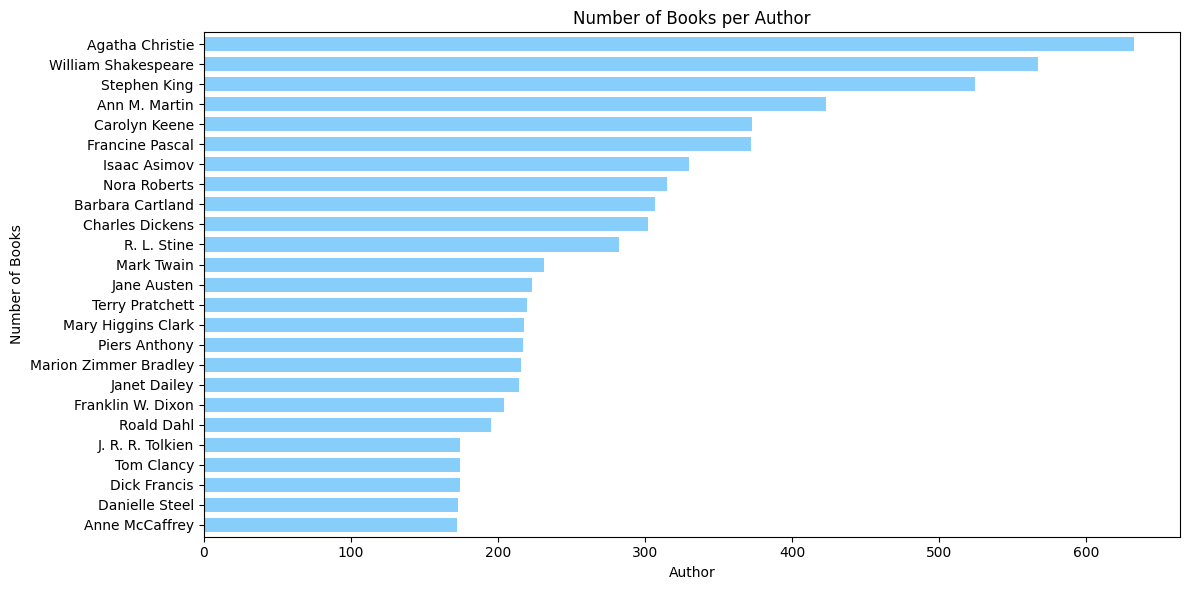

In [213]:
# get a count of most popular author names
pop_authors = books_clean.groupby(['Book-Author'])['ISBN'].count().sort_values().tail(25)

# plot
pop_authors.plot(kind='barh',color='lightskyblue', figsize=(12, 6), width=0.7)

# labels for the bars
plt.title('Number of Books per Author') # NOTE: this is only the top 50 authors, not all authors in the dataset
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks()
plt.tight_layout()

plt.show()

### Top 25 Best-Selling Authors with Average Book Ratings

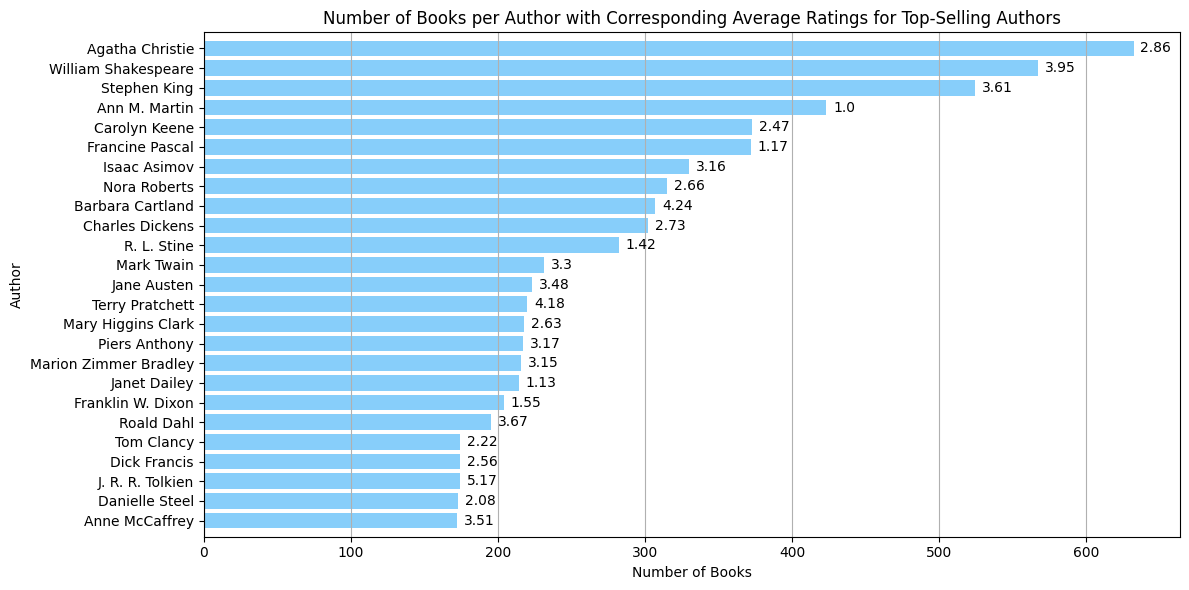

In [266]:
# Of our authors with the highest number of books (top 25), what is their average rating?

# pop_authors, avg_rate_author
# join: Book-Author

pop_authors = pop_authors.rename('Num-Books')

pop_author_rate = avg_rate_author.merge(pop_authors, left_on='Book-Author', right_index=True)
pop_author_rate.rename(columns={'mean':'Avg-Rating','count':'Num-Reviews'}, inplace=True)
pop_author_rate.sort_values('Num-Books',ascending=True, inplace=True)

# plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(pop_author_rate.index, pop_author_rate['Num-Books'], color='lightskyblue')

# labels for bars
ax.bar_label(bars, labels=pop_author_rate['Avg-Rating'], padding=5, fontsize=10)

# plotting labels
ax.set_xlabel('Number of Books')
ax.set_ylabel('Author')
ax.set_title('Number of Books per Author with Corresponding Average Ratings for Top-Selling Authors')
ax.yaxis.grid()

plt.margins(y=0.017)
plt.tight_layout()

plt.grid()
plt.show()

### Highest-Rated Authors with more than 1 Review

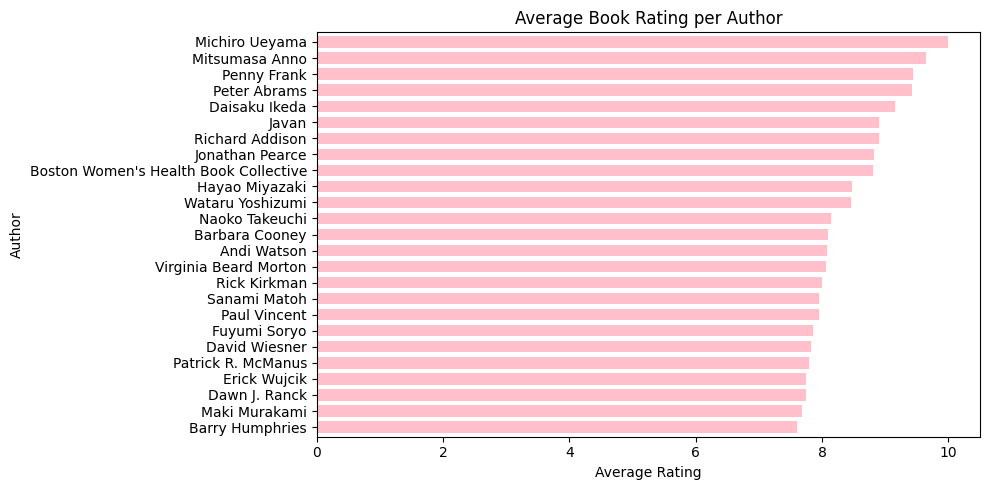

In [269]:
# Most successful author by avg. rating

# dfs: books_clean['Book-Author'], rate['Book-Rating']
# JOIN column(s): 'ISBN'

# get all ratings for each book by every author
rate_author = books_clean[['Book-Author', 'ISBN']].merge(rate[['ISBN','Book-Rating']], left_on='ISBN', right_on='ISBN')

# get avarage rating by each author for all of their books
# I think it would be more informative to have the number of reviews per author so I added that as well
avg_rate_author = rate_author.groupby('Book-Author')['Book-Rating'].agg(['mean','count']).round(2)

# It would be more useful to find authors with at least 10 reviews
top_authors_10r = avg_rate_author[avg_rate_author['count']>9].drop('count',axis=1).sort_values(by='mean').tail(25)

# plot most successful authors by avg. rating
#top_authors_10r.sort_values(by='mean').tail(25)
top_authors_10r.plot(kind='barh',color='pink', figsize=(10, 5), width=0.7, legend=False)

# labels for the bars
plt.title('Average Book Rating per Author') # NOTE: does not include authors with only 1 review
plt.xlabel('Average Rating')
plt.ylabel('Author')
plt.tight_layout()

plt.show()

### Top 25 Best-Selling Books

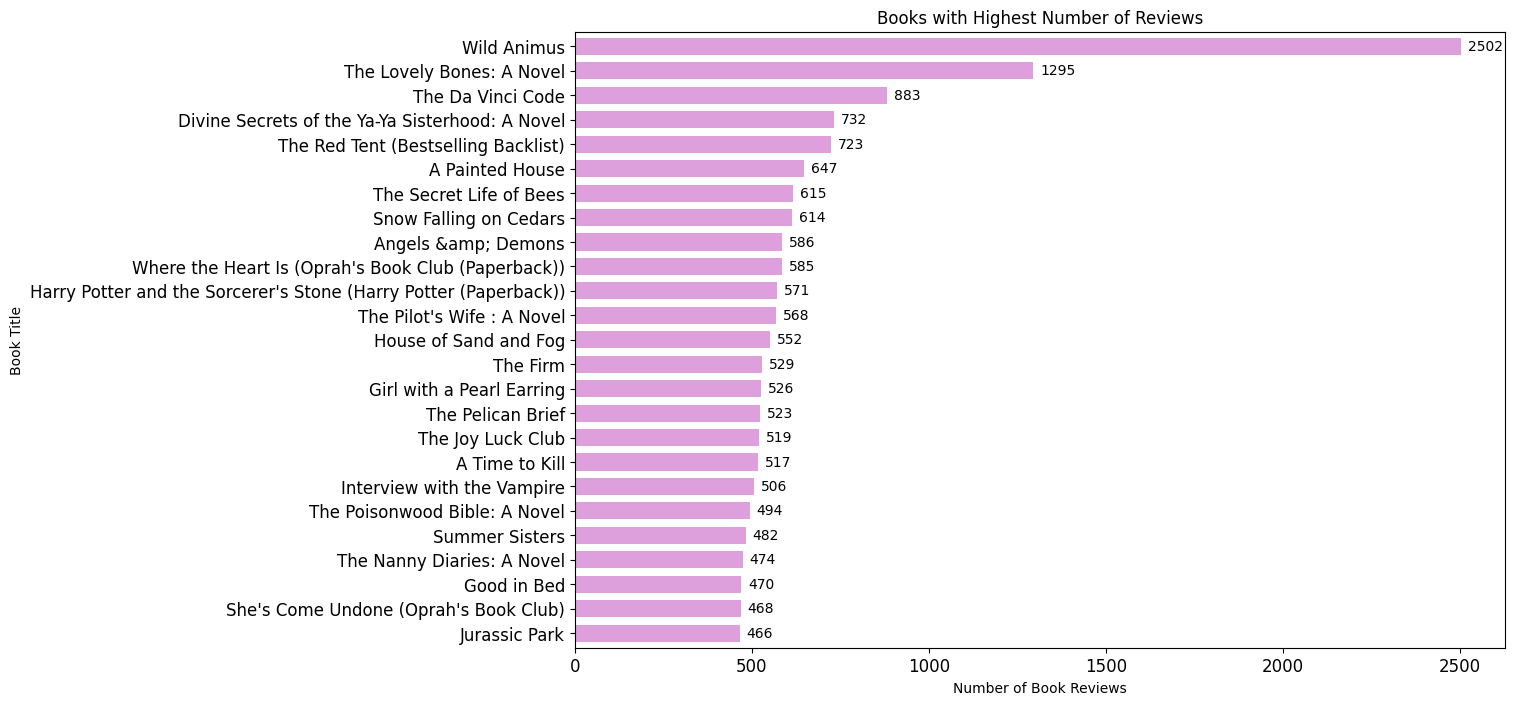

In [122]:
# Most popular book by number of reviews

# get number of reviews per ISBN
rate_count = rate.groupby(['ISBN'])['Book-Rating'].count().to_frame()

# get book names from Books df
rate_count_book = rate_count.merge(books_clean[['ISBN','Book-Title']], left_index=True, right_on='ISBN')

# clean up column names and sort
rate_count_book.rename(columns={'Book-Rating':'Book-Rating-Count'}, inplace=True)
rate_count_book.sort_values(['Book-Rating-Count'], ascending=True,inplace=True)

top_rate_count_book = rate_count_book.tail(25)

# plot
ax = top_rate_count_book.plot('Book-Title','Book-Rating-Count',kind='barh',color='plum', figsize=(12, 8), width=0.7, legend=False, fontsize=12)

# labels for bars
plt.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=5)

# plotting labels
plt.xlabel('Number of Book Reviews')
plt.ylabel('Book Title')
plt.title('Books with Highest Number of Reviews')

plt.grid(False)
plt.show()

### Pie Charts of Book Ratings

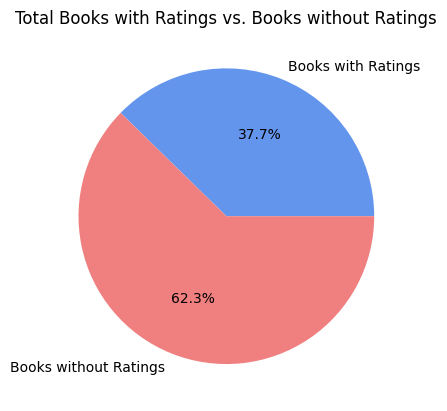

In [260]:
# number of books rated vs. not rated

rating_nonz = rate[rate['Book-Rating']>0].groupby(['Book-Rating'])['User-ID'].count().sum()
rating_zero = rate[rate['Book-Rating']==0].groupby(['Book-Rating'])['User-ID'].count().sum()

y = np.array([rating_nonz,rating_zero])
plt.pie(y, labels=['Books with Ratings', 'Books without Ratings'], autopct='%1.1f%%', colors = ['cornflowerblue', 'lightcoral'])
plt.title('Total Books with Ratings vs. Books without Ratings')

plt.show()

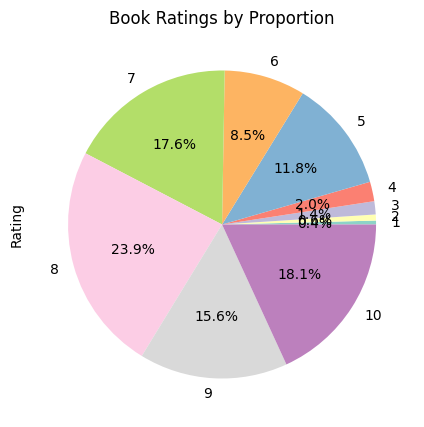

In [262]:
# Most popular rating types
ratings_group = rate[rate['Book-Rating']>0].groupby(['Book-Rating'])['User-ID'].count().rename('Rating')

ratings_group.plot.pie(figsize=(5, 5), autopct='%1.1f%%', title='Book Ratings by Proportion', colors=plt.cm.Set3.colors)

plt.show()

### Distribution of Book Ratings

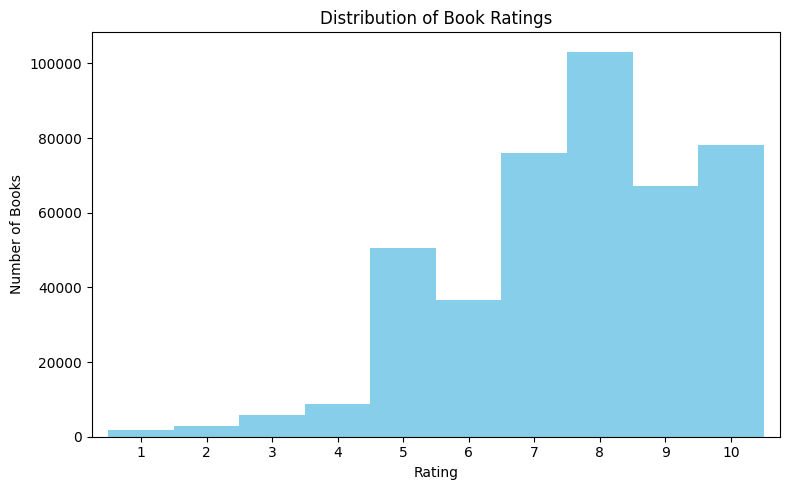

In [169]:
# Plot bar chart
plt.figure(figsize=(8, 5))
ratings_group.plot(kind='bar', color='skyblue', width=1.0)

# plot details
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Books')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

plt.tight_layout()
plt.show()

### Top 25 Highest-Rated Books

**Note:** This graph only includes books rated by at least 10 people.

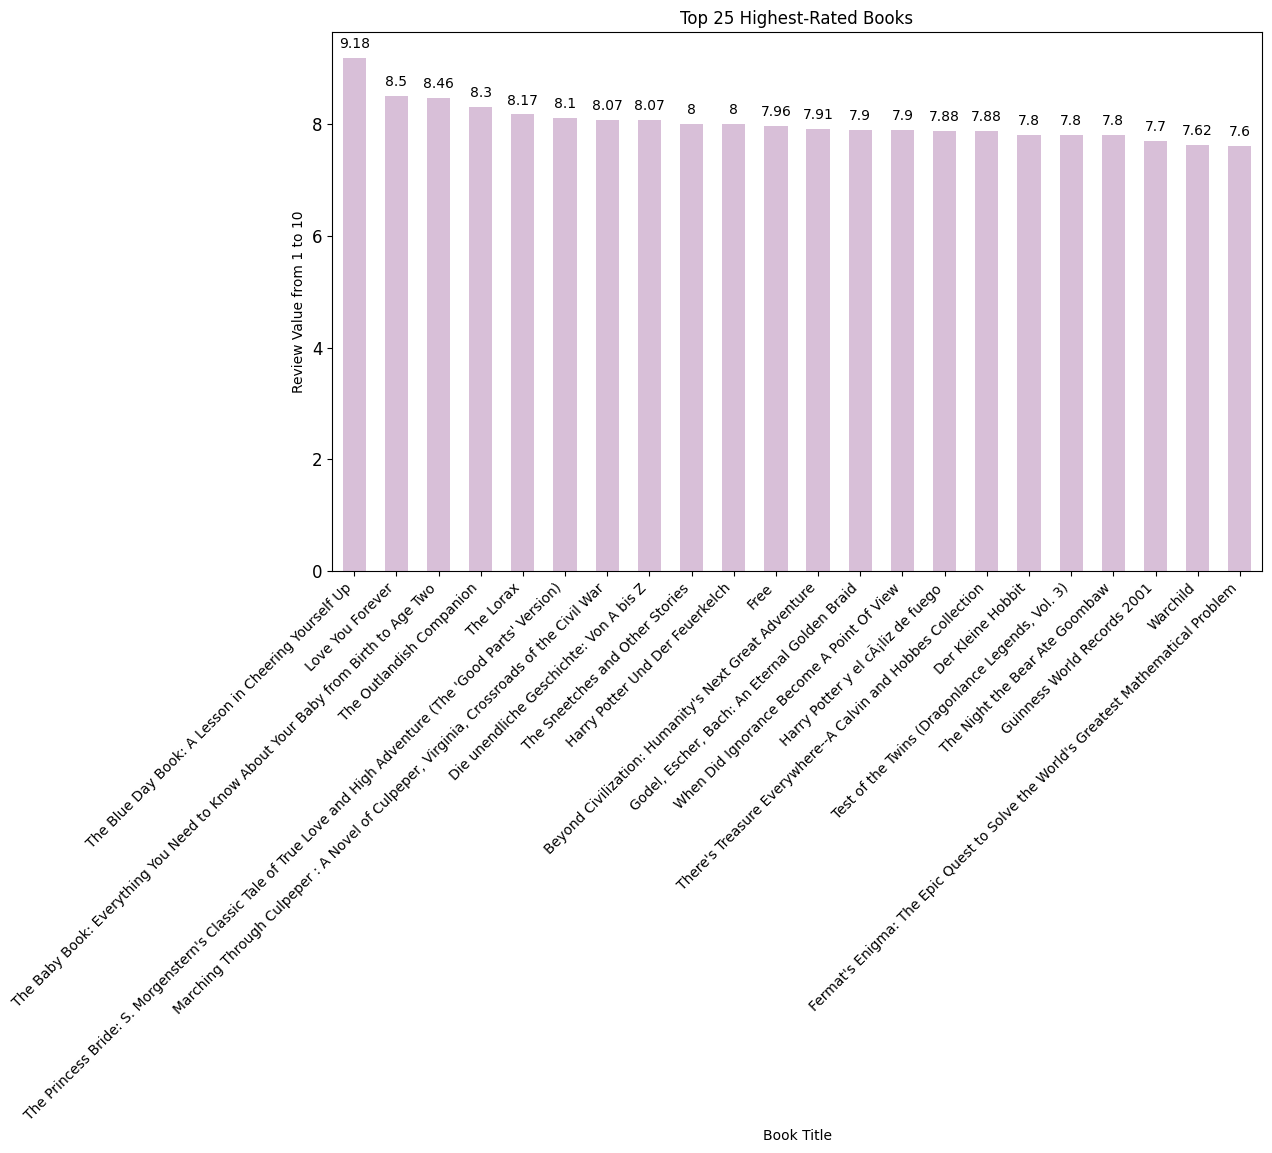

In [257]:
# Best book by avg rating
# lookings only at books with min of 10 reviews

# get avg of reviews per ISBN
rate_mean = rate.groupby(['ISBN'])['Book-Rating'].agg(['mean','count']).round(2)

# filter to books with at least 10 reviews
rate_mean = rate_mean[rate_mean['count']>9].drop('count',axis=1).sort_values(by='mean').tail(25)

# get book names from Books df
rate_mean_book = rate_mean.merge(books_clean[['ISBN','Book-Title']], left_index=True, right_on='ISBN')

# clean up column names and sort
rate_mean_book.rename(columns={'mean':'Avg-Book-Rating'}, inplace=True)
rate_mean_book.sort_values(['Avg-Book-Rating'], ascending=False, inplace=True)
top_rate_mean_book = rate_mean_book.head(25)

# plot
ax = top_rate_mean_book.plot('Book-Title','Avg-Book-Rating',kind='bar',color='thistle', figsize=(12, 7), width=0.55, legend=False, fontsize=12)

# labels for bars
plt.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=5)

# plotting labels
plt.xlabel('Book Title')
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.ylabel('Review Value from 1 to 10')
plt.title('Top 25 Highest-Rated Books')

plt.grid(False)
plt.show()

### Top 25 Publishing Companies by Number of Books Published

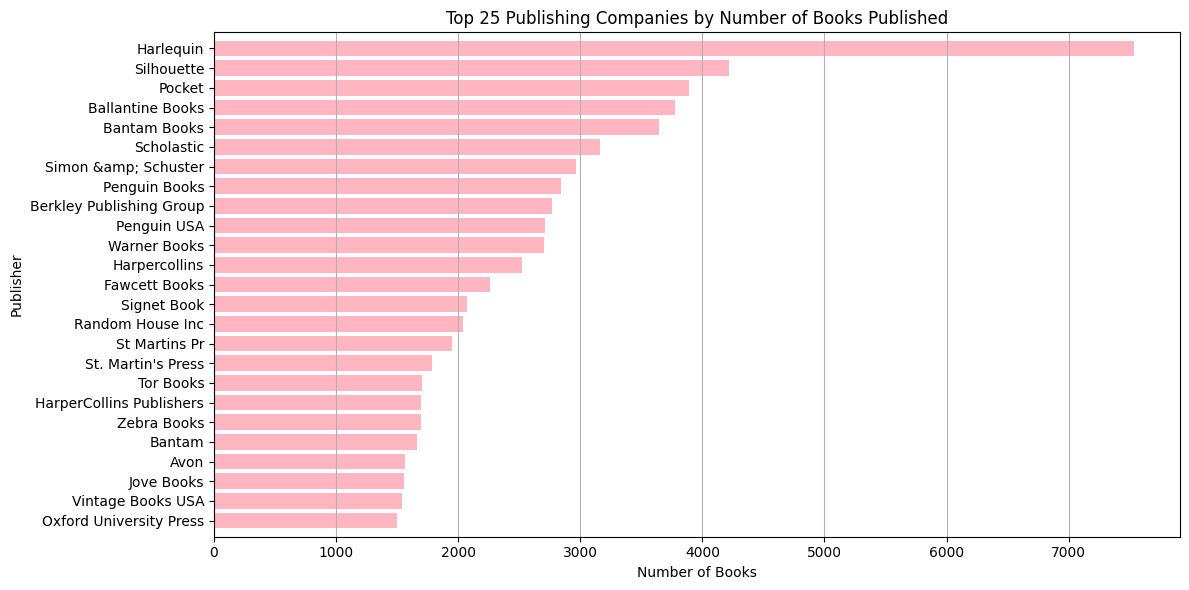

In [250]:
# Most popular publishing companies by number of books

# get a count of most popular author names
pop_pubs = books_clean.groupby(['Publisher'])['ISBN'].count().sort_values().tail(25)

# plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(pop_pubs.index, pop_pubs, color='lightpink')

# labels for the bars
ax.set_title('Top 25 Publishing Companies by Number of Books Published')
ax.set_ylabel('Publisher')
ax.set_xlabel('Number of Books')
ax.xaxis.grid(True)

plt.margins(y=0.017)
plt.tight_layout()

plt.show()

### Distribution of Books by Publishing Date

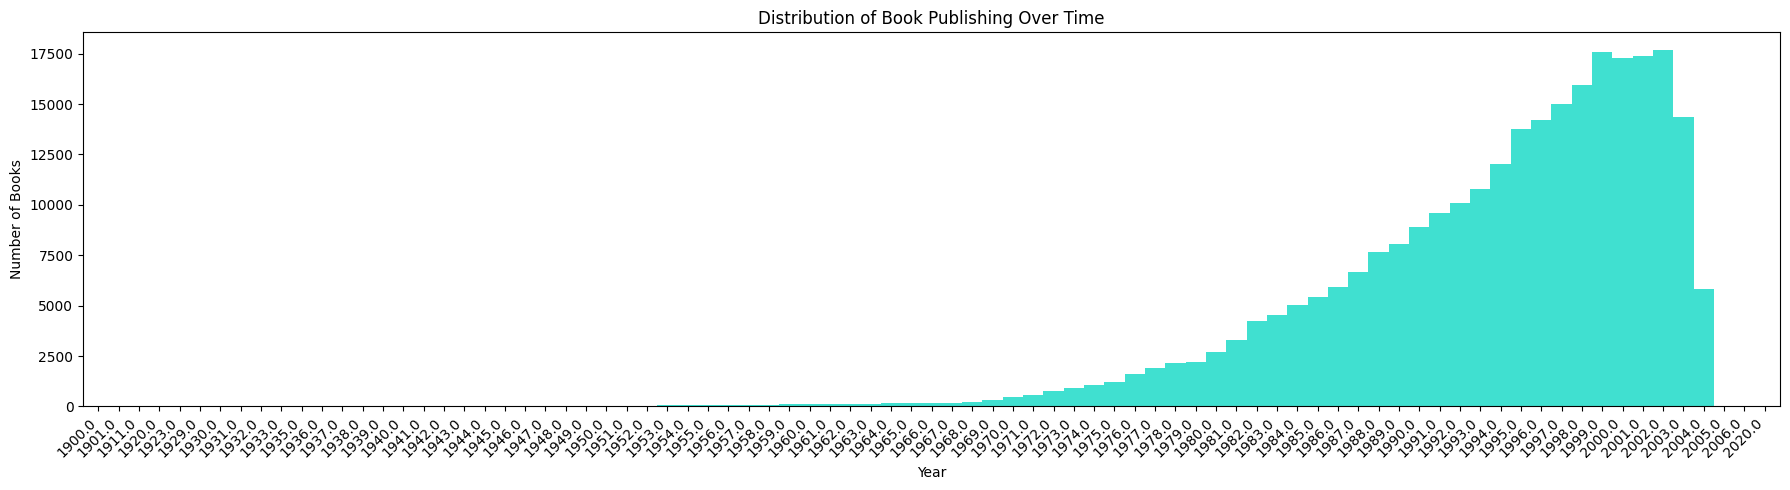

In [244]:
# Distribution of books by publishing date

pub_years = books_clean.groupby(['Year-Of-Publication'])['ISBN'].count()
pub_years = pub_years[pub_years>2]

plt.figure(figsize=(18, 5))
pub_years.plot(kind='bar', color='turquoise', width=1.0)

# plot details
plt.title('Distribution of Book Publishing Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

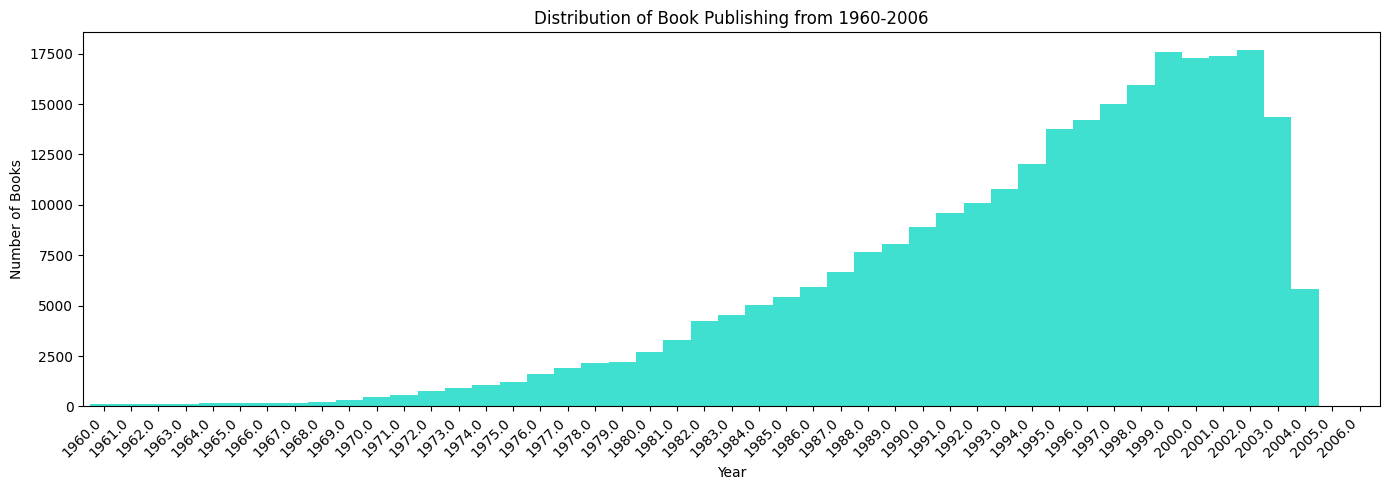

In [249]:
# let us look at the year range: 1960-2006 since that is where we see the most books published

pub_years_sub = pub_years.loc[1960:2007]

plt.figure(figsize=(14, 5))
pub_years_sub.plot(kind='bar', color='turquoise', width=1.0)

# plot details
plt.title('Distribution of Book Publishing from 1960-2006')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()